# Introduction to Statistics

In [1]:
# Loading data from the World Bank Library

import wbdata 
country = ['USA']
indicator = {'FI.RES.TOTL.CD' : 'gdp_growth'}

# Creating a dataframe
df = wbdata.get_dataframe(indicator, 
                         country = country,
                         convert_date = True)

# Wbdata extracts the data into a pandas dataframe.

In [2]:
# Given the World Bank gets several countries it become necessary specifying a country's ID - Let's get China as an example!

wbdata.search_countries('China')

id    name
----  --------------------
CHN   China
HKG   Hong Kong SAR, China
MAC   Macao SAR, China
TWN   Taiwan, China

In [3]:
# Indicator's ID by name must be specified as well. Let's get 'inflation' as en example!

wbdata.search_indicators('inflation')

id                    name
--------------------  -------------------------------------------------
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FP.FPI.TOTL.ZG        Inflation, food prices (annual %)
FP.WPI.TOTL.ZG        Inflation, wholesale prices (annual %)
NY.GDP.DEFL.87.ZG     Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG     Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG.AD  Inflation, GDP deflator: linked series (annual %)

In [4]:
# Wbdata includes many data sources such economical and social indicators. Sources that provide economical data is the focus. 

sources = wbdata.get_source()
sources

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [5]:
# Wbdata library give us a broad range of topics like health, economics, urban development and etc

wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

# Univariate Consumption Study Applying Regression

Here we can introduce the standard univariate (or simple) linear regression model - called the ordinary least-squares model which estimates the intercept and slop while diminushing the residuals. It applies the model to determine the relationship between the interest rates that U.S banks charge for lending and the market value of goods and services that U.S households consume annualy.

    It includes ways of conducting covariance analysis, correlation analysis, model development, cross-validation, hyperparameter optimization and model performance analysis.

Ordinary least-squares is one of the most common parametric methods because it establishes powerful claims regarding the data - it expects normality (values of a variable saturating the mean value) and linearity (an association between an independent variable and a dependent variable.

# Context for this problem solving

Ordinary least-squares regression model is being used to determine the linear relationship between the predictor variable (U.S lending interest rate as percentage) and the response variable (final consumption expenditure in current U.S dollars. 

### Hypothesis test

    H0: there's no significant difference between U.S lending interest rate (%) and the final consumption expenditure (in USD).
    H1: ther's a significant difference between U.S social contributions and the final consumption expenditure (in USD)

Hypothesis test seeks to determine whether a change in the U.S lending interest rate influences the final consumption expenditure (in USD).

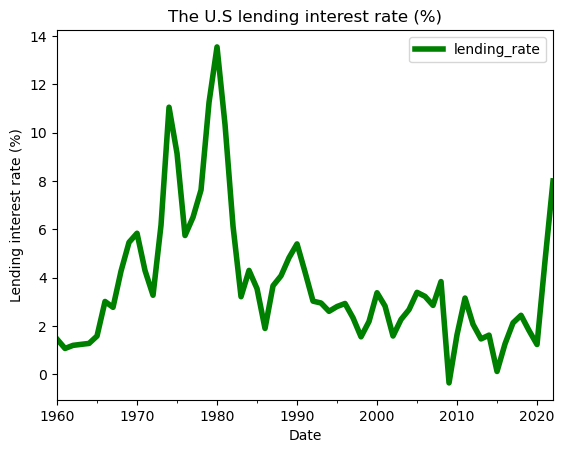

In [6]:
# Lending Interest Rate - estimates the rate that privates banks charge as interest for short-term 
# and mid-term loans expressed as an annual percentage.

import matplotlib.pyplot as plt 
%matplotlib inline

country = ['USA']
indicator = {'FP.CPI.TOTL.ZG': 'lending_rate'} # dictionary


# Creating a variable inflation_cpi

inflation_cpi = wbdata.get_dataframe (indicator, country = country, convert_date = True)

# Plotting the inflation

inflation_cpi.plot(kind = 'line', color = 'green', lw = 4)
plt.title('The U.S lending interest rate (%)')
plt.ylabel('Lending interest rate (%)')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()


Interpreting the graph we can see that from 1960 to 1980 the U.S banks charged as interest for private short-term and mid-term financing grew from around 1.6% to 13.6% around as the highest peak. In the early 1980s, the rate declined and the it remained significantly stagnant.

The lowest point on the lending interest rate reached was in 2008. With that, the most expensive lending interest rate was in the last of 1970s and the cheap lending interest rate was in 2008.

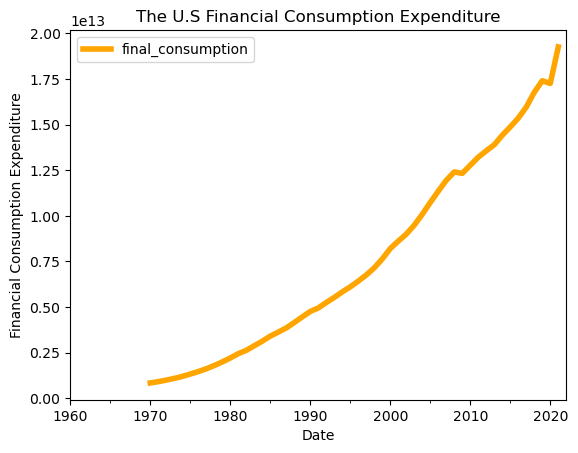

In [7]:
# Final Consumption Expenditure (in USD) - market value of general goods and services that households in an economy purchase.

country = ['USA']
indicator = {'NE.CON.TOTL.CD' : 'final_consumption'}

# creating a variable 'final_consumption'

final_consumption = wbdata.get_dataframe(indicator, country = country, convert_date = True)

# Plotting Final Consumption

final_consumption.plot(kind = 'line', color = 'orange', lw = 4)
plt.title('The U.S Financial Consumption Expenditure')
plt.ylabel('Financial Consumption Expenditure')
plt.xlabel('Date')
plt.legend(loc = 'best')
plt.show()

We can see there has been un uninterruptible upwising in the markey value of general goods and services U.S households purchased since 1970.

# Normality Assumption

Gaussian distribution shows saturation data points. Detect normality before training the model must be the done.

# Normality Detection

It involves investigating the central tendency of data points. 

In [8]:
# Loading the U.S Lending Interest rate and Final Consumption Expenditure Data

country = ['USA']
indicators = {'FR.INR.LEND' : 'lending_rate', 'NE.CON.TOTL.CD' : 'final_consumption'}

df = wbdata.get_dataframe(indicators, country = country, freq = 'M', convert_date = True)
df.head()

,lending_rate,final_consumption
date,,
2022-01-01,NaN,NaN
2021-01-01,3.250000,1.925631e+13
2020-01-01,3.544167,1.725454e+13
2019-01-01,5.282500,1.740150e+13
2018-01-01,4.904167,1.677191e+13


In [9]:
# Checking the misses values

df.isnull().sum()/df.shape[0]*100

lending_rate          1.587302
final_consumption    17.460317
dtype: float64

In [10]:
# As we can see there are missing values on both columns and we can replace the missing data points with the mean value.

df['lending_rate'] = df['lending_rate'].fillna(df['lending_rate'].mean())
df['final_consumption'] = df['final_consumption'].fillna(df['final_consumption'].mean())

df.head()

,lending_rate,final_consumption
date,,
2022-01-01,7.032231,7.600154e+12
2021-01-01,3.250000,1.925631e+13
2020-01-01,3.544167,1.725454e+13
2019-01-01,5.282500,1.740150e+13
2018-01-01,4.904167,1.677191e+13


# Descriptive Statistics

A good way to visualize and summarize the distribution of data can involve the use of a box plot which can also help to detect normality. This plot confirms the location of the median data point and also inform the length of the distribution tail, thus adequately supporting us in a diagnosing outliers in the data.

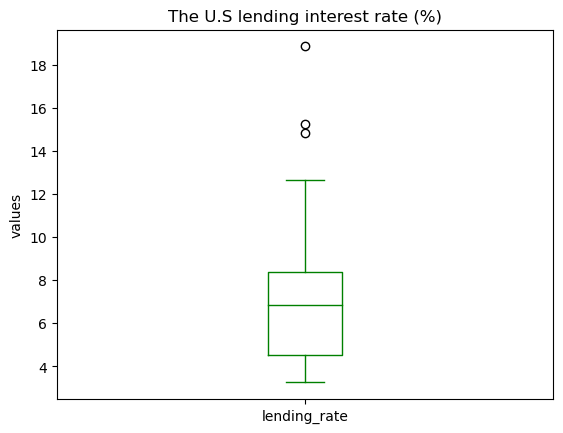

In [11]:
# Boxplot of the U.S lending Interest Rate Distribution

df['lending_rate'].plot(kind = 'box', color = 'green')
plt.title('The U.S lending interest rate (%)')
plt.ylabel('values')
plt.show()


There are three extreme values in the U.S lending interest rate data.



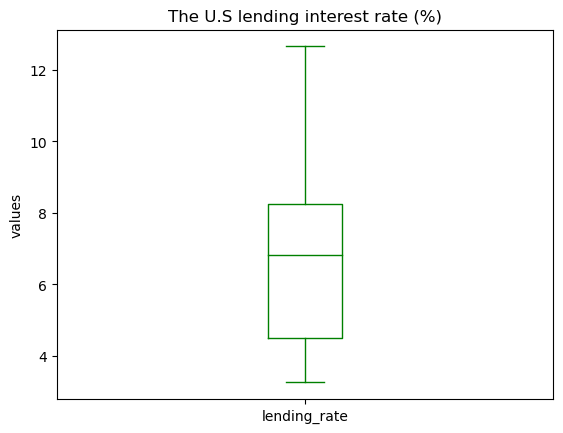

In [12]:
# Substituting any outliers with the mean data point and determining the new distrobution for Lending Interest Rate Distribution

import numpy as np

df['lending_rate'] = np.where((df['lending_rate'] > 14.5), df['lending_rate'].mean(), df['lending_rate'])
df['lending_rate'].plot(kind = 'box', color = 'green')
plt.title('The U.S lending interest rate (%)')
plt.ylabel('values')
plt.show()
plt.show()

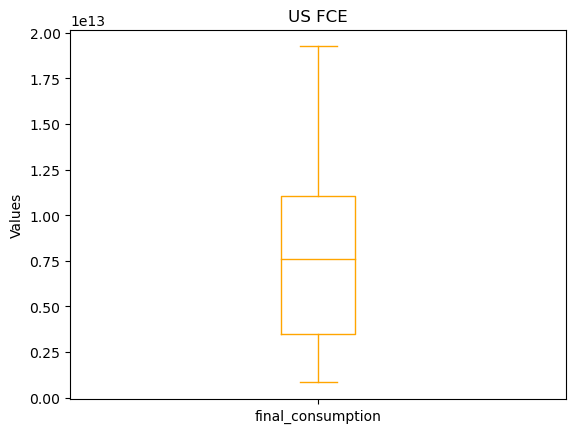

In [13]:
# U.S Final Consumption Expenditure Distribution

df['final_consumption'].plot(kind = 'box', color = 'orange')
plt.title('US FCE')
plt.ylabel('Values')
plt.show()

There are not outliers in the U.S Final Consumption Expenditure data.

# Descriptive Statistics

In [14]:
# Checking the central trend and the dispersion of data points

df.describe()

,lending_rate,final_consumption
count,63.000000,6.300000e+01
mean,6.589374,7.600154e+12
std,2.434694,4.908019e+12
min,3.250000,8.395100e+11
25%,4.500000,3.513868e+12
50%,6.824167,7.600154e+12
75%,8.237083,1.104064e+13
max,12.665833,1.925631e+13


Mean value (lending interest rate) = 6.58
mean value (final consumption expenditure) = 7.6

Data points of U.S lending interest rate data deviate (standard) from mean by 2.43 
Data points of final consumption expenditure data points deviate (standard) from the mean by 4.9

# Covariance Analysis

Covariance analysis involves estimating the extent to which variables vary with respect to each other. It can be considered a method used to measure how two variables change together.

In [15]:
# Covariance Matrix

dfcov = df.cov()
dfcov

,lending_rate,final_consumption
lending_rate,5.927737e+00,-8.083172e+12
final_consumption,-8.083172e+12,2.408865e+25


U.S lending interest rate variance is 5.927737e+00 and that the final consumption expenditure varies by 2.408865e+25.
The joint variability between the lending interest rate and the U.S final consumption expenditure is -8.083172e+12.

# Correlation Analysis

Correlation analysis estimates the dependency among variables. There are three principal correlation methods: Pearson correlation method which can estimate dependency among continuous variable; Kendall method which can estimate dependency among categorical variables; and the Spearman method which also can estimate an association among categorical variables.

Macroeconomics data is often continuous the Pearson correlation coefficient measures the linear relationship between two continuous variables and provides a measure of how closely these variables are associated.

You can estimate that coefficient by dividing the covariance between the U.S lending interest rate and the U.S final consumption expenditure by the square root of the sum of the deviations.

In [16]:
# Pearson Correlation Matrix

dfcorr = df.corr(method = 'pearson')
dfcorr

,lending_rate,final_consumption
lending_rate,1.000000,-0.676443
final_consumption,-0.676443,1.000000


Relationship: U.S lending interest rate (%) and the final consumption expenditure (in USD)

Pearson Correlation Coefficient =  -0.676443

Findings: extreme negative correlation between U.S lending interest rate (%) and final consumption expenditure (in USD)

C:\Users\rafae\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


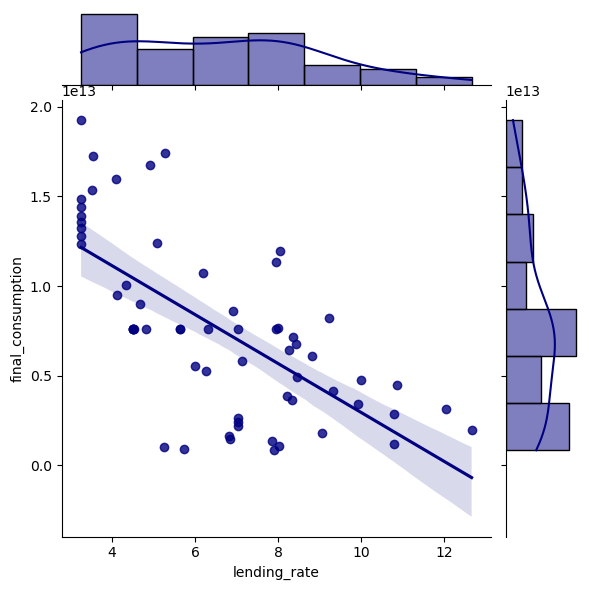

In [17]:
# Pairwise Scatter Plot - show the statistical difference between U.S lending interest rate and final consumption expenditure

import seaborn as sns

sns.jointplot(x = 'lending_rate', y = 'final_consumption', data = df,
              kind = 'reg', color = 'navy')
plt.show()

The plot confirm that there's a negative correlation between the U.S lending interest rate and the final consumption expenditure. As the behaviour of the diagonal line is sloping downward from left to right.


# Ordinary Least-Squares Regression Model

It is the most commonly used regression model for prediction called the ordinary least-squares model which estimates the intercept and coefficients while diminishing residuals. 

In [18]:
# Ordinary Least-Squares Regression Model Development Applying using Stats Models Library

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.array(df["lending_rate"]) # creating an x array (data points of U.S Lending interest rate)
y = np.array(df["final_consumption"])  # creating an y array (data points of U.S final consumption (in USD))
x = x.reshape(-1,1) # shapping the data so that the Ordinary Least-squares regression model better studies the data
y = y.reshape(-1,1) # shapping the data so that the Ordinary Least-squares regression model better studies the data

# Splitting the data into training and test data by applying train_test_split() method

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=False)

# Standardizing the data in such a way that the mean data point is 0 and the standard deviation is 1

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_constant = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     68.37
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           8.67e-11
Time:                        21:05:26   Log-Likelihood:                -1512.8
No. Observations:                  50   AIC:                             3030.
Df Residuals:                      48   BIC:                             3033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.001e+12   4.82e+11     16.603      0.000    7.03e+12    8.97e+12
x1         -3.985e+12   4.82e+11     -8.269      0.000   -4.95e+12   -3.02e+12
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.705
Skew:                          -0.087   Prob(JB):                        0.703
Kurtosis:                       2.445   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS regression results

The results show the type of estimator applies to test the significante of the relationship between the U.S. lending interest rate and U.S final consumption expenditure. It also show the model learns the availabe U.S macroeconomic data and how it generates future instances of the final U.S consumption expenditure, including errors which makes when estimating those instances. 

In summary, it helps us decide whether must accept the existence of the established macroeconomic phenomenon, including the degree to which we can rely on the model to estimate future instances.

To test the claim that U.S lending interest rate influences the U.S final consumption expenditure we must find p-value to determine the significance of the relationship. In addition, we determine how the ordinary least-suares model expresses the amount of information it lost when estimating the future values of the final consumption expenditure. To further assess the chosen model's performance we must estimate the R2 score.

## Table OLS Regression results

R-squared (R²): The R² value is 0.588, which means that approximately 58.8% of the variability in the dependent variable (y) is explained by the model. Generally, a higher R² is preferable, but how high is considered "good" depends on the field of study and the analysis objectives. In some contexts, an R² of 0.588 may be deemed good, while in others, it may be deemed insufficient.

F-statistic: The F-test value is 68.37, with a very low p-value (8.67e-11). This suggests that the model is statistically significant as a whole.

Coefficients: The coefficients, such as the coefficient for x1, indicate the relationship between the variables. In your case, an increase in x1 is associated with a substantial decrease in y. The interpretation of these coefficients depends on the context of the analysis.

Tests of Normality: Normality tests indicate that the model's residuals follow a normal distribution, which is an important assumption for linear regression.

# Ordinary Least-Squares Regression Model using Scikit-learn

Although the model has been able to identify the relationship between the variables and explain pf the variability, it may not be as accurate in prediction future values of the dependent variable based on the independent libraries. Therefore, caution should be exercised when using the model for future forecasts, as its performance in the testes isn't satisfactory.

Scikit-learn is a popular open source library and this approach has a competitive edge over statsmodels because it provides an easier way to control how the model behaves and to validate its performance. In addition, it was a wide range of regression models such as ridge, lasso and elasticNet, among others.

In [19]:
# Ordinary Least-Squares Regression Model Development Applying Scikit-learn

# Create arrays 'x' and 'y' from DataFrame 'df' for independent and dependent variables
x = np.array(df['lending_rate'])
y = np.array(df['final_consumption'])

# Reshape 'x' and 'y' to make them suitable for linear regression
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model 'lm' and fit it to the training data
lm = LinearRegression()
lm.fit(x_train, y_train)



LinearRegression()

# Cross-validation 

applies the cross_val_score() method to validate the performance of the default ordinary least-square regression model over different subsets of the same data, it applies R2 to find a score since Sklearn doesn't calculate the adjusted R2. It then estimates the mean and standard deviation of the validation score.



In [20]:
# Ordinary Least-Squares Regression Model Cross-Validation

from sklearn.model_selection import cross_val_score

def get_val_score(model, x_train, y_train):
    lm_scores = cross_val_score(model, x_train, y_train, scoring="r2")
    print("CV mean: ", np.mean(lm_scores))
    print("CV std: ", np.std(lm_scores))

get_val_score(lm, x_train, y_train)


CV mean:  0.4343494549250829
CV std:  0.14908808552014297


Cross-validation for OLS regression is a technique used to assess the performance of a linear regression model. It envolves dividing the data into training and testing subsets, enabling the model to be tested on data that wasn't used for training. This helps determine how well the model generalizes to new data while identifying potential issued like overfitting or underfitting.

A cross-validation result for regression is generally considered an indication that the model is fitting well when the mean (CV mean) of the cross-validation score is high and the standard deviation (CV std) is low. 

    A high mean close to 1.0 indicates that the model is fitting well to the training data and is capable of making accurate predictions.
    
    A low standard deviation (CV std) suggests that the model's performance is consistent across different cross-validation subsets, which is a good indication that it is not overfitting to the training data.

Based on the provided values:

- CV mean: 0.4343 (reasonably high)
- CV std: 0.1491 (relatively low)

These results suggests the model is making a reasonable fit to the data and doesn't appear to be suffering from significant overfitting or underfitting.

In [21]:
# Find where the Spill begins in the data 

y_test.shape

(13, 1)

# Prediction

In [22]:
import pandas as pd

# The actual U.S FInal Consumption Expenditure and Predicted U.S Final Consumption Expenditures

# Create a dataframe 'actual_values' with the y_test values (actual U.S Final Consumption Expenditure)

# Rename the column in the 'actual_values' DataFrame

actual_values = pd.DataFrame(y_test)
actual_values.columns = ['Actual FCE']

# Create a DataFrame 'predicted_values' with predicted values of U.S Final Consumption Expenditures
predicted_values = pd.DataFrame(lm.predict(x_test))
predicted_values.columns = ['Predicted FCE']

# Concanate the 'actual_values' and 'predicted_values' DataFrames side by side 
actual_and_predicted_values = pd.concat([actual_values, predicted_values], axis = 1)

# Set the index of the resulting Dataframe to be datetime values from the original data (first 13 rows)
actual_and_predicted_values.index = pd.to_datetime(df[:13].index)

# Display the dataframe containing actual and predicted values
actual_and_predicted_values


,Actual FCE,Predicted FCE
date,,
2022-01-01,1.990125e+12,6.549467e+11
2021-01-01,1.088700e+12,6.273644e+12
2020-01-01,7.600154e+12,1.014614e+13
2019-01-01,9.088970e+11,9.054260e+12
2018-01-01,4.757180e+12,3.869088e+12
2017-01-01,4.150467e+12,4.708918e+12
2016-01-01,5.525024e+12,8.719537e+12
2015-01-01,1.462173e+12,7.703272e+12
2014-01-01,1.321017e+13,1.204660e+13


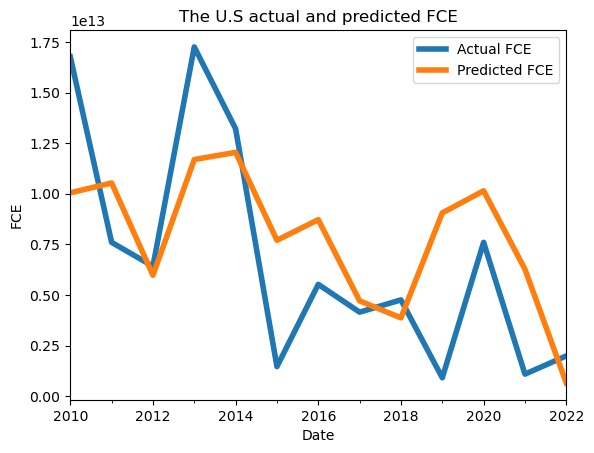

In [23]:
# The Actual and Predicted U.S Final Consumption Expenditures 

actual_and_predicted_values.plot(lw = 4)
plt.xlabel('Date')
plt.title('The U.S actual and predicted FCE')
plt.ylabel('FCE')
plt.legend(loc = 'best')
plt.show()

In [24]:
# Estimate Intercept

lm.intercept_

array([7.80145493e+12])

The result `lm.intercept_` represents the estimated intercept value in a linear regression model. In this specific case, it's approximately `7.80145493e+12`, indicating the estimated starting value of the dependent variable when all independent variables are zero.

In [25]:
# Estimate Coefficient
lm.coef_

array([[-3.22669981e+12]])

The coefficient is approximately -3.22669981e+12. This indicates how much the dependent variable changes when the corresponding independent variable changes by one unit.

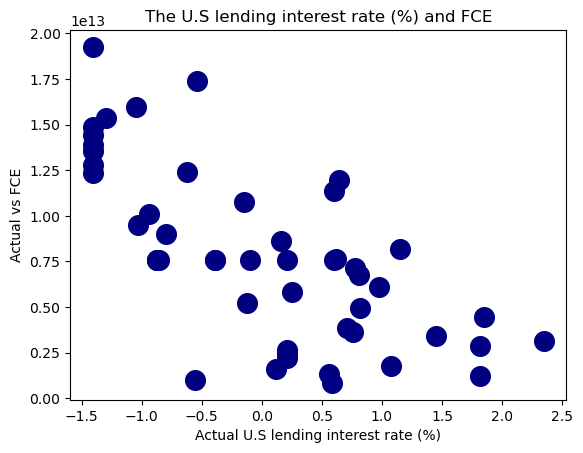

In [26]:
# Lending Interest Rate and Final Consumption Expenditure

plt.scatter(x_train, y_train, color = 'navy', s=200)
plt.title('The U.S lending interest rate (%) and FCE')
plt.ylabel('Actual vs FCE')
plt.xlabel('Actual U.S lending interest rate (%)')
plt.show()

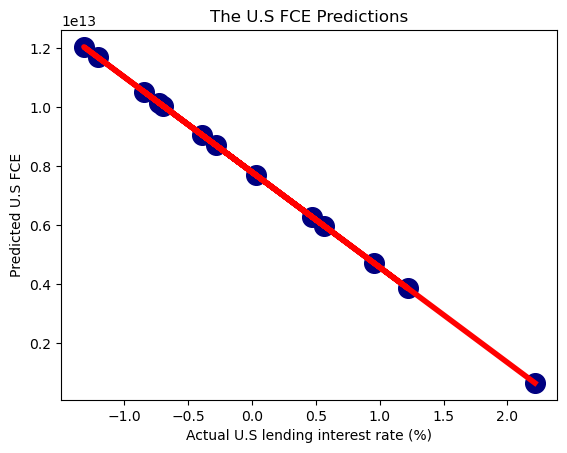

In [27]:
# U.S Final Consumption Expenditure Predictions

# Extract the x and y data series from the DataFrames
x_series = x_test.squeeze()  # Squeeze to convert to a 1D array
y_series = predicted_values.squeeze()

# Plot the data
plt.scatter(x_series, y_series, color='navy', s=200)
plt.plot(x_series, y_series, color='red', lw=4)
plt.title('The U.S FCE Predictions')
plt.xlabel('Actual U.S lending interest rate (%)')
plt.ylabel('Predicted U.S FCE')
plt.show()


The plot shows that the actual data points of the U.S lending interest rate and the predicted data points of the final consumption expenditure are perfectly linear, by construction.

# Residual Analysis

A residual represents an estimate of the difference between the data points that the linear regression method estimates and the actual data points. A residual is like a prediction error, it's an estimate of how much the data points predicted by a linear regression model differ from the actual data points. In simpler terms, it tells us how 'off' the model's predictions are compared to the real data.


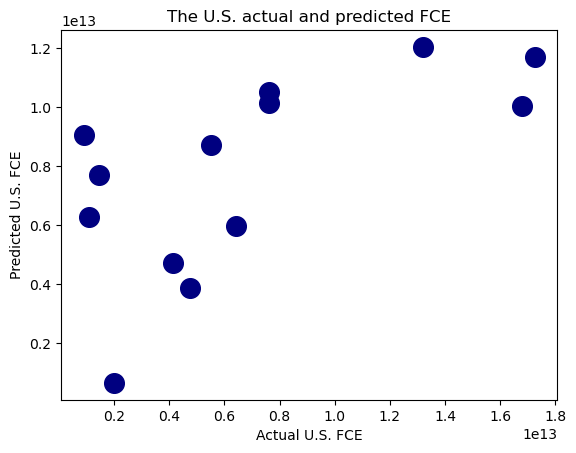

In [28]:
# U.S actual and Predicted Values of Final Consumption Expenditures

plt.scatter(y_test,predicted_values,color="navy",s=200)
plt.title("The U.S. actual and predicted FCE")
plt.xlabel("Actual U.S. FCE")
plt.ylabel("Predicted U.S. FCE")
plt.show()

It appears that the points are unevenly distributed and seem to follow an exponential trend.

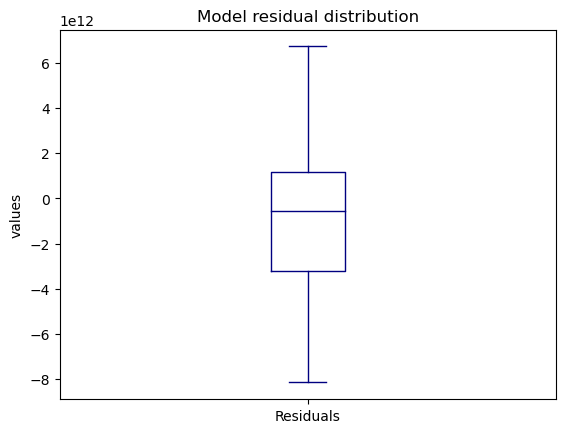

In [29]:
# Ordinary Least-Squares Regression Model Residual Distribution

residuals = y_test - predicted_values
residuals = pd.DataFrame(residuals)
residuals.columns = ['Residuals']
residuals.plot(kind = 'box', color = 'navy')
plt.title('Model residual distribution')
plt.ylabel('values')
plt.show()

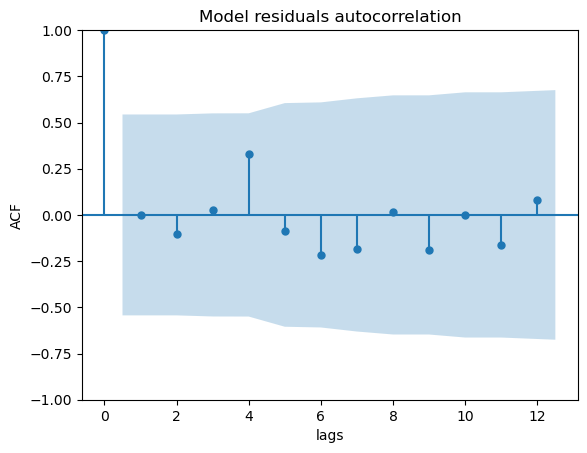

In [30]:
# Ordinary Least-Squares Regression Model Residual Autocorrelation

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.title('Model residuals autocorrelation')
plt.xlabel('lags')
plt.ylabel('ACF')
plt.show()


The ACF plot shows there are no other lags exceeding the blue region which indicates the control limit. It is good because the presence of autocorrelation in the residuals can violate one of the fundamental assumptions of linear regression.

It also indicates that the residuals are approximately independent and don't exhibit a significant serial correlation structure. This is a desirable as it assumes that there are no systematic patterns left unaccounted for by the model. Therefore, the lack of significant autocorrelation in the residuals after the first lag is good news for the validity of the linear regression model.

# Ordinary Least-Squares Regression Model Performance Metrics

Mean absolute Error - represents the average magnitude of the errors prior to regressing the variables.

- Mean Squared Erro r- represents an average of the sum errors.
- Root MSE - representsthe varuability explained after regressing variables. Apply RMSe when you don't want huge residuals.
- R squared - represents the extent to which a regressor explains the variability in the data.


In [31]:
# Ordinary Least-Squares Regression Model Performance Matrix

from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, predicted_values)
MSE = metrics.mean_squared_error(y_test, predicted_values)
RMSE = np.sqrt(MSE)
EV = metrics.explained_variance_score(y_test, predicted_values)
R2 = metrics.r2_score(y_test, predicted_values)
lmmodelevation = [[MAE, MSE, RMSE, EV, R2]]
lmmodelevationdata = pd.DataFrame(lmmodelevation, index = ['Values'], columns = ('Mean Absolute Error',
                                                                                'Mean Squared Error',
                                                                                'Root Mean Squared Error',
                                                                                'Explained Variance Score',
                                                                                'R-Squared'))
lmmodelevationdata

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Squared
Values,3.455928e+12,1.831668e+25,4.279799e+12,0.41061,0.378309


It shows that the ordinary least-squares regression model explains 37.38% (0.378309) of the variability in the data. The magnitude average of the errors prior to regressing variables is 3.455928e+12 and the average sum of error is 1.831668e+25. 

Last, the explained variance score is 52.46%, further confirming mediocrity in the model.

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 45 instead of 50.
  warnings.warn(


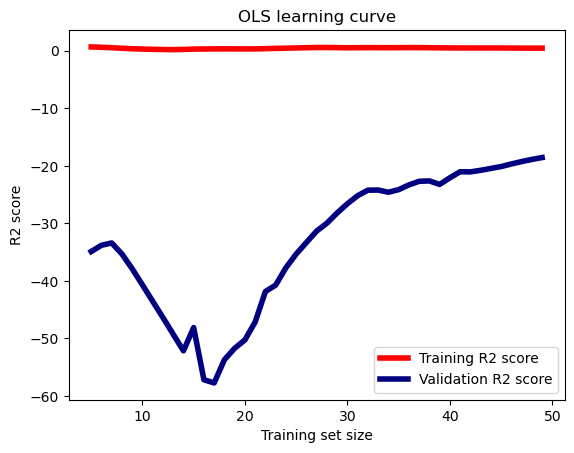

In [39]:
from sklearn.model_selection import learning_curve

trainsizelogreg, trainscorelogreg, testscorelogreg = learning_curve(lm,
                                                                    x,y,cv=5, n_jobs=-1,
                                                                    scoring="r2",
                                                                    train_sizes=np.linspace(0.1,1.0,50, endpoint = False))
trainscorelogreg_mean = np.mean(trainscorelogreg,axis=1)
trainscorelogreg_std = np.std(trainscorelogreg,axis=1)
testscorelogreg_mean = np.mean(testscorelogreg,axis=1)
testscorelogreg_std = np.std(testscorelogreg,axis=1)
fig, ax = plt.subplots()
plt.plot(trainsizelogreg,trainscorelogreg_mean, label="Training R2 score", color="red",lw=4)
plt.plot(trainsizelogreg,testscorelogreg_mean, label="Validation R2 score",color="navy", lw=4)
plt.title("OLS learning curve")
plt.xlabel("Training set size")
plt.ylabel("R2 score")
plt.legend(loc=4)
plt.show()

The graph shows that the linear regression model performed poorly during validation compared to training. This is indicated by the fact that the R2 during validation is lower than the R2 during training.

When the validation R2 score is consistently below the training R2 score on a learning curve, it typically indicates that the model is suffering from overfitting.